[-1.51935128  8.43369458]
[ -1.51935128 -13.0484833 ]
[-1.51935128 36.27569866]
[ -1.51935128 -76.97513151]
[ -1.51935128 183.05455477]
[  -1.51935128 -413.98685578]
[ -1.51935128 956.85066826]
[-1.51935128e+00 -2.19066217e+03]
[-1.51935128e+00  5.03618778e+03]
[-1.51935128e+00 -1.15570282e+04]
[-1.51935128e+00  2.65418416e+04]
[-1.51935128e+00 -6.09351058e+04]
[-1.51935128e+00  1.39916425e+05]
[-1.51935128e+00 -3.21248930e+05]
[-1.51935128e+00  7.37610238e+05]
[-1.51935128e+00 -1.69358440e+06]
[-1.51935128e+00  3.88856243e+06]
[-1.51935128e+00 -8.92833128e+06]
[-1.51935128e+00  2.04999101e+07]
[-1.51935128e+00 -4.70688325e+07]
[-1.51935128e+00  1.08072445e+08]
[-1.51935128e+00 -2.48139838e+08]
[-1.51935128e+00  5.69741726e+08]
[-1.51935128e+00 -1.30815604e+09]
[-1.51935128e+00  3.00359298e+09]
[-1.51935128e+00 -6.89640260e+09]
[-1.51935128e+00  1.58344920e+10]
[-1.51935128e+00 -3.63568009e+10]
[-1.51935128e+00  8.34770684e+10]
[-1.51935128e+00 -1.91667605e+11]
[-1.51935128e+00  4.4007

[-1.51935128e+00 -1.38806824e+92]
[-1.51935128e+00  3.18707544e+92]
[-1.51935128e+00 -7.31768771e+92]
[-1.51935128e+00  1.68017841e+93]
[-1.51935128e+00 -3.85777528e+93]
[-1.51935128e+00  8.85764873e+93]
[-1.51935128e+00 -2.03376131e+94]
[-1.51935128e+00  4.66961965e+94]
[-1.51935128e+00 -1.07216848e+95]
[-1.51935128e+00  2.46175349e+95]
[-1.51935128e+00 -5.65231152e+95]
[-1.51935128e+00  1.29779954e+96]
[-1.51935128e+00 -2.97981392e+96]
[-1.51935128e+00  6.84180467e+96]
[-1.51935128e+00 -1.57091323e+97]
[-1.51935128e+00  3.60689688e+97]
[-1.51935128e+00 -8.28161912e+97]
[-1.51935128e+00  1.90150197e+98]
[-1.51935128e+00 -4.36594547e+98]
[-1.51935128e+00  1.00244334e+99]
[-1.51935128e+00 -2.30166101e+99]
[-1.51935128e+00  5.28473104e+99]
[-1.51935128e+000 -1.21340119e+100]
[-1.51935128e+000  2.78603099e+100]
[-1.51935128e+000 -6.39686920e+100]
[-1.51935128e+000  1.46875378e+101]
[-1.51935128e+000 -3.37233357e+101]
[-1.51935128e+000  7.74304980e+101]
[-1.51935128e+000 -1.77784371e+102]


Sssssssss


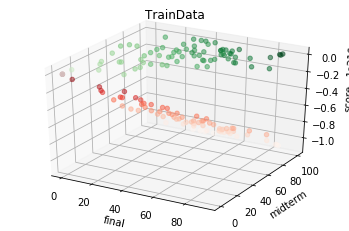

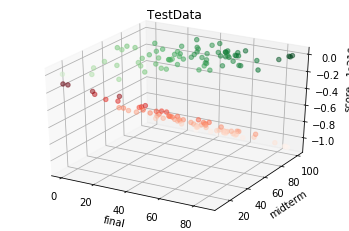

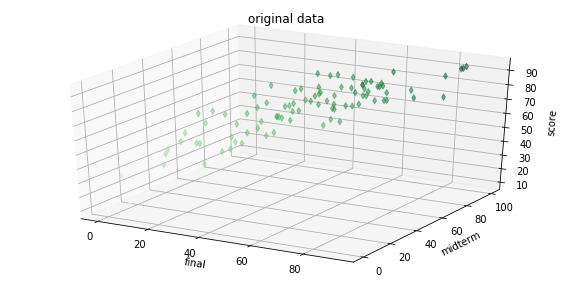

In [9]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
c=0

def pred(x, mlist):
    return np.dot(np.transpose(mlist),x)+c

def gradientDescent(x, y, mlist, n, learning_rate, epochs=600):
    global c
    for iteration in range(epochs):
        m_grad = 0
        c_grad=0
        for j in range(len(mlist)):
            for i in range(n):
                m_grad += (pred(x[i], mlist) - y[i]) * x[i][j]
            c_grad+=pred(x[i],mlist)-y[i]
        m_grad *= 2/n
        c_grad*=2/n
        mlist[j] = mlist[j] -  (learning_rate * m_grad)
        c=c-learning_rate*c_grad
        print(mlist)
    return mlist

def generateZValues(x, mlist):
    z_values = []
    for i in range(len(x)):
        z_values.append(pred(x[i], mlist))
    return z_values

def plotdef(features, output, mlist,title):
    x = []
    y = [] 
    for feature in features:
        x.append(feature[0])
        y.append(feature[1])
    z = generateZValues(features, mlist)
    
    fig = plt.figure()   
    ax = plt.gca(projection='3d')
    ax.scatter(x,y ,output , c = output, s= 20, alpha=0.5, cmap=plt.cm.Greens)
    ax.scatter(x,y ,z , c = z, s= 20, alpha=0.5, cmap=plt.cm.Reds)
    plt.title(title)
    ax.set_xlabel('final')
    ax.set_ylabel('midterm')
    ax.set_zlabel('score')

file='/Users\jaewon\Desktop\dbscore_midfinal.xlsx'
data=pd.read_excel(file)
data=data.sample(frac=1).reset_index(drop=True)
final = np.asarray(data['final'])
midterm = np.asarray(data['midterm'])
score = np.asarray(data['score'])

temp = np.asarray([[fi, mid] for fi, mid in zip(final, midterm)]) # Gets our features
training_features, test_features = temp[:int(len(temp) * 0.8)], temp[int(len(temp) * 0.2):]

temp = np.asarray([i for i in score]) 
training_output, test_output = temp[:int(len(temp) * 0.8)], temp[int(len(temp) *0.2):]  # Splits our outputs in half between training and testing

mlist = np.random.uniform(-2, 2, size=2)
learning_rate = 0.0002
gradientDescent(training_features, training_output, mlist, len(training_output), learning_rate)

plotdef(training_features, training_output, mlist, 'TrainData')
plotdef(test_features, test_output, mlist, 'TestData')


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

print("Sssssssss")
ax.scatter(final,midterm ,score , c = score, s= 20, alpha=0.5, cmap=plt.cm.Greens, marker='d')
plt.title("original data")
ax.set_xlabel('final')
ax.set_ylabel('midterm')
ax.set_zlabel('score')
plt.show()


In [3]:
import pandas as pd
import numpy as np
file='/Users\jaewon\Desktop\dbscore_midfinal.xlsx'
df=pd.read_excel(file)

import statsmodels.api as sm
x=sm.add_constant(df.loc[:,['midterm','final']])
y=df.score.values
#n=x.size
model=sm.OLS(y,x)
ls=model.fit()
print(ls.summary())
#print(ls.params())
#t-table에서 가로:샘플개수(60개)+유의수준5%->2.~.
#95%의 확률로 가설을 기각할 확률. t=2, t0=24.7, p=0(유의수준 0%)->너무 rare->가설기각
#t값보고 2보다 큰지 판단.
#신뢰도구간.
#숙제연장으로 4가지 해서 제출. r-square, se, se coef, ttest, confidence-interval.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1194.
Date:                Sat, 07 Dec 2019   Prob (F-statistic):           5.30e-65
Time:                        11:19:00   Log-Likelihood:                -227.46
No. Observations:                  92   AIC:                             460.9
Df Residuals:                      89   BIC:                             468.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.8191      0.959     23.786      0.0

In [5]:
x

,const,midterm,final
0,1.0,100.000000,86.0
1,1.0,97.485714,86.0
2,1.0,98.000000,85.0
3,1.0,90.000000,83.0
4,1.0,95.000000,61.0
5,1.0,70.000000,92.0
6,1.0,68.000000,82.0
7,1.0,82.485714,74.0
8,1.0,85.000000,62.0
9,1.0,90.000000,55.0


epoch 0 : m_grad=38985.160000 24960.460000, c_grad=518.360000, m=-35.985160 -21.960460, c=-0.518360


C:\Users\jaewon\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars
C:\Users\jaewon\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in double_scalars
C:\Users\jaewon\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


epoch 300 : m_grad=nan nan, c_grad=nan, m=nan nan, c=nan
epoch 600 : m_grad=nan nan, c_grad=nan, m=nan nan, c=nan
epoch 900 : m_grad=nan nan, c_grad=nan, m=nan nan, c=nan


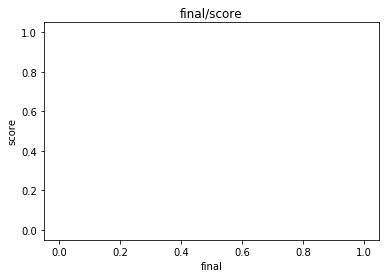



m=nan,c=nan


3

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file='/Users\jaewon\Desktop\dbscore_midfinal.xlsx'
df=pd.read_excel(file)

y=df.score.values
x1=df.midterm.values
x2=df.final.values



epochs=1000
min_grad=0.0001
learning_rate=0.001
n=x1.size
m1=3.0 
m2=3.0 
c=0.0
for epoch in range(epochs):
    c_grad=0.0
    m1_grad=0.0
    m2_grad=0.0
    for i in range(n):
        y_pred=m1*x1[i]+m2*x2[i]+c
        m1_grad=m1_grad+(y_pred-y[i])*x1[i]
        m2_grad=m2_grad+(y_pred-y[i])*x2[i]
        c_grad=c_grad+(y_pred-y[i])
    m1_grad=round(m1_grad*2/n,2)
    m2_grad=round(m2_grad*2/n,2)
    c_grad=round(c_grad*2/n,2)
    
    m1=m1-learning_rate*m1_grad
    m2=m2-learning_rate*m2_grad
    c=c-learning_rate*c_grad
    
    if(abs(m1_grad)<min_grad and abs(m2_grad)<min_grad and abs(c_grad)<min_grad):

        break
    if epoch%300==0:
        print("epoch %d : m_grad=%f %f, c_grad=%f, m=%f %f, c=%f" %(epoch,m1_grad,m2_grad,c_grad,m1,m2,c))
plt.title("final/score")
plt.xlabel("final")
plt.ylabel("score")
plt.plot(x,m1*x1+m2*x2+c,color='red')
plt.show()
print("\n\nm=%f,c=%f" %(m,c))
3

epoch 0 : m_grad=-5744.510000, c_grad=-128.090000, m=5.744510, c=0.128090
epoch 300 : m_grad=-17325784974441917754921327283415245192002250154762583850084561579009129183615523032402522862657104802581779799205085867204664679775875879987203106026328948736.000000, c_grad=-329909657418331538184000227354456066485033609905582900717343225826755417477048385178969681040263150617447513239187025911339820234760065957256213717204336640.000000, m=13247081269407996424971571652686566567991600936731659383499841265348263339108054824757487530791823097947285717962757618514615252126596908898270499699687424.000000, c=252244850656410943691069382048130404118151017304231779103059713927014144776579790439269514578864440851717186048998105779393543080257401102906478594883584.000000


C:\Users\jaewon\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in double_scalars
C:\Users\jaewon\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


epoch 600 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 900 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 1200 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 1500 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 1800 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 2100 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 2400 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 2700 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 3000 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 3300 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 3600 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 3900 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 4200 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 4500 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 4800 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 5100 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 5400 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 5700 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 6000 : m_grad=nan, c_grad=nan, m=nan, c=nan
epoch 6300 : m_grad=nan, c_grad=nan, m=nan, c=nan
ep

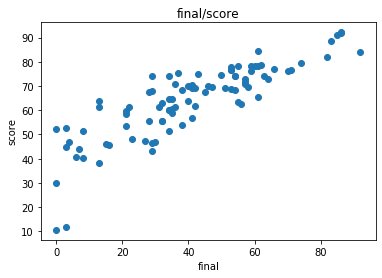



m=nan,c=nan


3

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file='/Users\jaewon\Desktop\dbscore_midfinal.xlsx'
df=pd.read_excel(file)

x=df.final.values
y=df.score.values
plt.scatter(x,y)
plt.plot()


epochs=10000
min_grad=0.0001
learning_rate=0.001
n=x.size
m=0.0 
c=0.0
for epoch in range(epochs):
    c_grad=0.0
    m_grad=0.0
    for i in range(n):
        y_pred=m*x[i]+c
        m_grad=m_grad+(y_pred-y[i])*x[i]
        c_grad=c_grad+(y_pred-y[i])
    m_grad=round(m_grad*2/n,2)
    c_grad=round(c_grad*2/n,2)
    
    m=m-learning_rate*m_grad
    c=c-learning_rate*c_grad
    
    if(abs(m_grad)<min_grad and abs(c_grad)<min_grad):
        break
    if epoch%300==0:
        print("epoch %d : m_grad=%f, c_grad=%f, m=%f, c=%f" %(epoch,m_grad,c_grad,m,c))
plt.title("final/score")
plt.xlabel("final")
plt.ylabel("score")
plt.plot(x,m*x+c,color='red')
plt.show()
print("\n\nm=%f,c=%f" %(m,c))
3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file='/Users\jaewon\Desktop\dbscore_midfinal.xlsx'
df=pd.read_excel(file)

x=df.final.values
y=df.score.values
plt.scatter(x,y)
plt.plot()


epochs=1000
min_grad=0.0001
learning_rate=0.001
n=x.size
m=0.0 
c=0.0
for epoch in range(epochs):
    c_grad=0.0
    m_grad=0.0
    for i in range(n):
        y_pred=m*x[i]+c
        print(y_pred)
        m_grad=m_grad+(y_pred-y[i])*x[i]
        print(m_grad)
        c_grad=c_grad+(y_pred-y[i])
    m_grad=m_grad*2/n
    c_grad=c_grad*2/n
    
    m=m-learning_rate*m_grad
    c=c-learning_rate*c_grad
    
    if(abs(m_grad)<min_grad and abs(c_grad)<min_grad):
        break
    if epoch%300==0:
        print("epoch %d : m_grad=%f, c_grad=%f, m=%f, c=%f" %(epoch,m_grad,c_grad,m,c))
plt.title("final/score")
plt.xlabel("final")
plt.ylabel("score")
plt.plot(x,m*x+c,color='red')
plt.show()
print("\n\nm=%f,c=%f" %(m,c))